In [8]:
import os

# Using raw string
path = r"C:\Users\ajayk\.cache\kagglehub\datasets\alinedobrovsky\plant-disease-classification-merged-dataset\versions\1"
print(os.listdir(path))

['Apple__black_rot', 'Apple__healthy', 'Apple__rust', 'Apple__scab']


**Building CNN Based On AlexNet Architecture**

In [9]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 27, 27, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │     2,973,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 6, 6, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 28,117,790 (107.26 MB)

 Trainable params: 28,096,654 (107.18 MB)

 Non-trainable params: 21,136 (82.56 KB)

In [10]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d_5
1 max_pooling2d_3
2 batch_normalization_8
3 conv2d_6
4 max_pooling2d_4
5 batch_normalization_9
6 conv2d_7
7 batch_normalization_10
8 conv2d_8
9 batch_normalization_11
10 conv2d_9
11 max_pooling2d_5
12 batch_normalization_12
13 flatten_1
14 dense_4
15 dropout_3
16 batch_normalization_13
17 dense_5
18 dropout_4
19 batch_normalization_14
20 dense_6
21 dropout_5
22 batch_normalization_15
23 dense_7


In [6]:
# we chose to train the top 2 conv blocks, i.e. we will freeze
# the first 8 layers and unfreeze the rest:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6


**Loading Weights To The Model**

In [11]:
#trainable parameters decrease after freezing some bottom layers   
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 27, 27, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │     2,973,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 6, 6, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 28,117,790 (107.26 MB)

 Trainable params: 28,096,654 (107.18 MB)

 Non-trainable params: 21,136 (82.56 KB)

**Fine Tuning By Freezing Some Layers Of Our Model**

In [14]:
from keras import optimizers

classifier.compile(
    optimizer=optimizers.SGD(
        learning_rate=0.001,  # use learning_rate instead of lr
        momentum=0.9
        # decay parameter is deprecated
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# ============================
# 1️⃣ Imports
# ============================
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

# ============================
# 2️⃣ Paths and parameters
# ============================
base_dir = r"C:\Users\ajayk\.cache\kagglehub\datasets\alinedobrovsky\plant-disease-classification-merged-dataset\versions\1"
batch_size = 32
img_height, img_width = 224, 224
epochs = 25

# ============================
# 3️⃣ Image data generators
# ============================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

valid_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_generator.num_classes
train_num = train_generator.samples
valid_num = valid_generator.samples

# ============================
# 4️⃣ AlexNet model
# ============================
classifier = Sequential([
    Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(img_height, img_width,3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, (5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, (3,3), padding='same', activation='relu'),
    Conv2D(384, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # matches your dataset
])

# ============================
# 5️⃣ Compile model
# ============================
classifier.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ============================
# 6️⃣ Checkpoint
# ============================
weightpath = "best_weights_9.weights.h5"
checkpoint = ModelCheckpoint(
    weightpath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='max'
)
callbacks_list = [checkpoint]

# ============================
# 7️⃣ Train model
# ============================
history = classifier.fit(
    train_generator,
    steps_per_epoch=train_num // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_num // batch_size,
    epochs=epochs,
    callbacks=callbacks_list,
    verbose=1
)

# ============================
# 8️⃣ Save full model
# ============================
classifier.save("AlexNetModel.h5")
print("✅ Model saved successfully!")


Found 2663 images belonging to 4 classes.
Found 664 images belonging to 4 classes.


c:\CDC_Training\EDP_Project\Crop-Disease-Detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\CDC_Training\EDP_Project\Crop-Disease-Detection\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4226 - loss: 1.3267
Epoch 1: val_accuracy improved from None to 0.51406, saving model to best_weights_9.weights.h5
83/83 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.4755 - loss: 1.2771 - val_accuracy: 0.5141 - val_loss: 1.2002
Epoch 2/25
 1/83 ━━━━━━━━━━━━━━━━━━━━ 1:11 866ms/step - accuracy: 0.5625 - loss: 1.1395

c:\CDC_Training\EDP_Project\Crop-Disease-Detection\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.51406
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.5625 - loss: 1.1395 - val_accuracy: 0.5141 - val_loss: 1.2016
Epoch 3/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5021 - loss: 1.2231
Epoch 3: val_accuracy did not improve from 0.51406
83/83 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.4964 - loss: 1.2146 - val_accuracy: 0.5141 - val_loss: 1.1692
Epoch 4/25
 1/83 ━━━━━━━━━━━━━━━━━━━━ 1:18 956ms/step - accuracy: 0.4375 - loss: 1.2966
Epoch 4: val_accuracy did not improve from 0.51406
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.4375 - loss: 1.2966 - val_accuracy: 0.5141 - val_loss: 1.1673
Epoch 5/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4982 - loss: 1.1584
Epoch 5: val_accuracy improved from 0.51406 to 0.52656, saving model to best_weights_9.weights.h5
83/83 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.4960 - loss: 1.1387 - val_accuracy: 0.5266 - val_loss: 1.0519
Epoch 6/25
 1/83 ━━━━━━━━━━

✅ Model saved successfully!


In [20]:
class_dict = train_generator.class_indices
print("\nClass mapping:")
print(class_dict)


Class mapping:
{'Apple__black_rot': 0, 'Apple__healthy': 1, 'Apple__rust': 2, 'Apple__scab': 3}


In [21]:
li = list(class_dict.keys())
print(li)

['Apple__black_rot', 'Apple__healthy', 'Apple__rust', 'Apple__scab']


In [22]:
train_num = train_generator.samples
valid_num = valid_generator.samples


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

# ============================
# 1️⃣ Checkpoint (save best model)
# ============================
weightpath = "best_weights_9.weights.h5"  # use .weights.h5 for weights only
checkpoint = ModelCheckpoint(
    weightpath,
    monitor='val_accuracy',  # updated name
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='max'
)
callbacks_list = [checkpoint]

# ============================
# 2️⃣ Train the Model
# ============================
history = classifier.fit(
    train_generator,  # updated name (not training_set)
    steps_per_epoch=train_num // batch_size,
    validation_data=valid_generator,  # updated name (not valid_set)
    validation_steps=valid_num // batch_size,
    epochs=25,
    callbacks=callbacks_list,
    verbose=1
)

# ============================
# 3️⃣ Save the Full Model
# ============================
filepath = "AlexNetModel.h5"  # use .h5 for full model
classifier.save(filepath)
print("✅ Model saved successfully at:", filepath)


Epoch 1/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7620 - loss: 0.6276
Epoch 1: val_accuracy improved from None to 0.68281, saving model to best_weights_9.weights.h5
83/83 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7503 - loss: 0.6496 - val_accuracy: 0.6828 - val_loss: 0.7807
Epoch 2/25
 1/83 ━━━━━━━━━━━━━━━━━━━━ 1:03 769ms/step - accuracy: 0.6562 - loss: 0.9225
Epoch 2: val_accuracy improved from 0.68281 to 0.73438, saving model to best_weights_9.weights.h5
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.6562 - loss: 0.9225 - val_accuracy: 0.7344 - val_loss: 0.6918
Epoch 3/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7512 - loss: 0.6326
Epoch 3: val_accuracy improved from 0.73438 to 0.74375, saving model to best_weights_9.weights.h5
83/83 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7556 - loss: 0.6275 - val_accuracy: 0.7437 - val_loss: 0.6450
Epoch 4/25
 1/83 ━━━━━━━━━━━━━━━━━━━━ 1:20 986ms/step - accuracy: 0.7188 - loss: 0.8122
Epoch 4: val_accu

✅ Model saved successfully at: AlexNetModel.h5


In [8]:
import os
from PIL import Image

# 🔹 Paths
source_dir = r"C:\Users\ajayk\.cache\kagglehub\datasets\alinedobrovsky\plant-disease-classification-merged-dataset\versions\1"   # Folder with original grayscale images
target_dir = r"C:\Users\ajayk\.cache\kagglehub\datasets\alinedobrovsky\plant-disease-classification-merged-dataset\rgb_datasets"        # Folder where RGB images will be saved

# Create target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Loop through subfolders (classes)
for class_name in os.listdir(source_dir):
    class_source = os.path.join(source_dir, class_name)
    class_target = os.path.join(target_dir, class_name)
    if os.path.isdir(class_source):
        os.makedirs(class_target, exist_ok=True)  # Create class folder in target
        for file_name in os.listdir(class_source):
            file_source = os.path.join(class_source, file_name)
            file_target = os.path.join(class_target, file_name)
            try:
                img = Image.open(file_source)
                if img.mode != 'RGB':   # Convert only if not already RGB
                    img = img.convert('RGB')
                img.save(file_target)
            except Exception as e:
                print(f"⚠️ Skipping {file_source}: {e}")

print("✅ All images converted to RGB and saved in the new folder!")


✅ All images converted to RGB and saved in the new folder!


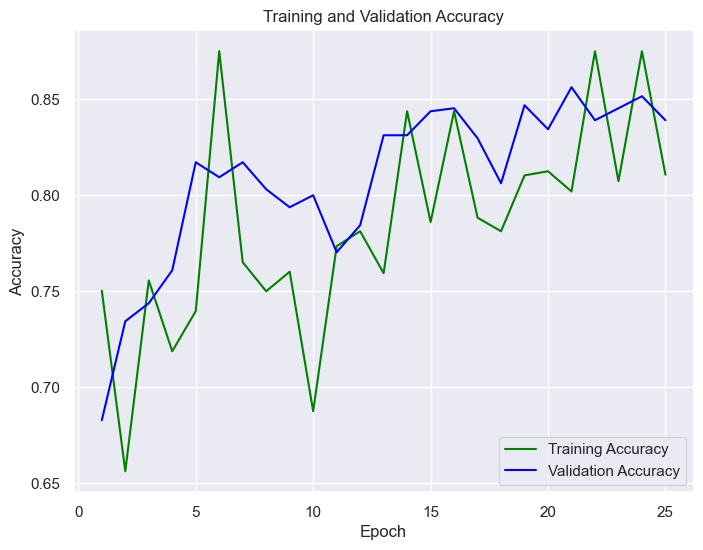

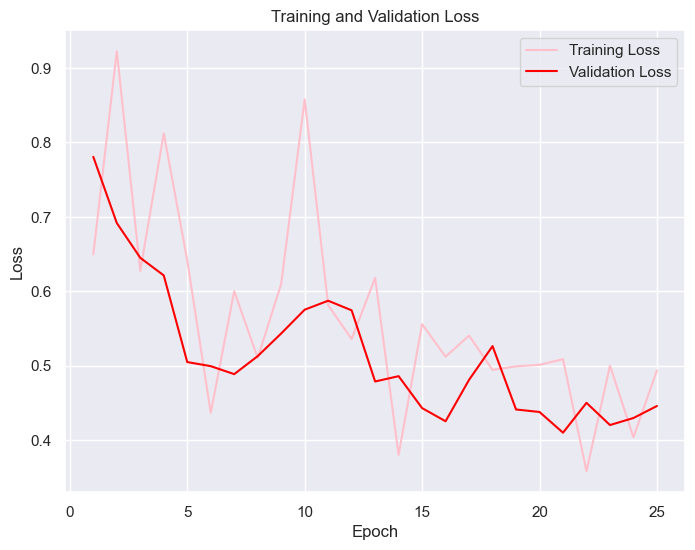

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Get training history values safely
acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')
epochs = range(1, len(loss) + 1)

# ============================
# 1️⃣ Accuracy Plot
# ============================
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ============================
# 2️⃣ Loss Plot
# ============================
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
✅ Prediction: Apple__black_rot
🔹 Confidence: 80.02%


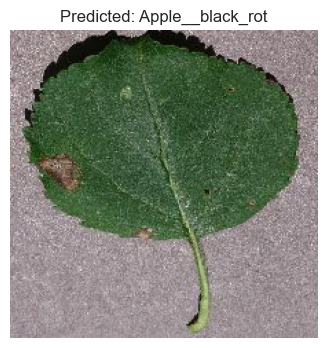

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# ============================
# 1️⃣ Load and preprocess image
# ============================
image_path = r"C:\Users\ajayk\.cache\kagglehub\datasets\alinedobrovsky\plant-disease-classification-merged-dataset\versions\1\Apple__black_rot\00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG"   # 🔹 change this to your actual test image path
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # normalize

# ============================
# 2️⃣ Predict
# ============================
predictions = classifier.predict(img)
predicted_class_index = np.argmax(predictions[0])   # class index with highest probability

# ============================
# 3️⃣ Map prediction to class name
# ============================
# 🔹 Get class labels from your training generator
class_labels = list(train_generator.class_indices.keys())  # e.g. ['Apple___healthy', 'Tomato___Early_blight', ...]
predicted_class_name = class_labels[predicted_class_index]

print(f"✅ Prediction: {predicted_class_name}")
print(f"🔹 Confidence: {np.max(predictions[0]) * 100:.2f}%")

# ============================
# 4️⃣ Show image with label
# ============================
plt.figure(figsize=(4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class_name}")
plt.show()


In [21]:
# ================================================================
# 🌱 Optimized AlexNet for Plant Disease Classification
# ================================================================

import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# ================================================================
# 1️⃣ Paths and parameters
# ================================================================
base_dir = r"C:\Users\ajayk\.cache\kagglehub\datasets\alinedobrovsky\plant-disease-classification-merged-dataset\versions\1"
batch_size = 32
img_height, img_width = 224, 224
epochs = 40  # longer training

# ================================================================
# 2️⃣ Data augmentation with normalization
# ================================================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

valid_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_generator.num_classes
train_num = train_generator.samples
valid_num = valid_generator.samples

# ================================================================
# 3️⃣ Compute class weights to handle imbalance
# ================================================================
y_train = train_generator.classes
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(enumerate(class_weights))

# ================================================================
# 4️⃣ Optimized AlexNet model
# ================================================================
classifier = Sequential([
    Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(img_height, img_width,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    Conv2D(256, (5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    Conv2D(384, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(384, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.3),  # reduced dropout
    Dense(4096, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# ================================================================
# 5️⃣ Compile model with Adam
# ================================================================
classifier.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ================================================================
# 6️⃣ Callbacks
# ================================================================
checkpoint = ModelCheckpoint(
    "best_alexnet.weights.h5",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='max'
)

earlystop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,  # give enough epochs to converge
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

callbacks_list = [checkpoint, earlystop, reduce_lr]

# ================================================================
# 7️⃣ Train model
# ================================================================
history = classifier.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    steps_per_epoch=train_num // batch_size,
    validation_steps=valid_num // batch_size,
    class_weight=class_weights,
    callbacks=callbacks_list,
    verbose=1
)

# ================================================================
# 8️⃣ Save full model
# ================================================================
classifier.save("AlexNet_Optimized.h5")
print("✅ Optimized AlexNet model saved successfully!")


Found 2663 images belonging to 4 classes.
Found 664 images belonging to 4 classes.


c:\CDC_Training\EDP_Project\Crop-Disease-Detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\CDC_Training\EDP_Project\Crop-Disease-Detection\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5427 - loss: 2.1462
Epoch 1: val_accuracy improved from None to 0.11094, saving model to best_alexnet.weights.h5
83/83 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6176 - loss: 1.5276 - val_accuracy: 0.1109 - val_loss: 2.3080 - learning_rate: 1.0000e-04
Epoch 2/40
 1/83 ━━━━━━━━━━━━━━━━━━━━ 4:50 4s/step - accuracy: 0.5938 - loss: 2.0728

c:\CDC_Training\EDP_Project\Crop-Disease-Detection\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.11094
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.5938 - loss: 2.0728 - val_accuracy: 0.1109 - val_loss: 2.2546 - learning_rate: 1.0000e-04
Epoch 3/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7290 - loss: 0.9116
Epoch 3: val_accuracy did not improve from 0.11094
83/83 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.7362 - loss: 0.8526 - val_accuracy: 0.1109 - val_loss: 8.6554 - learning_rate: 1.0000e-04
Epoch 4/40
 1/83 ━━━━━━━━━━━━━━━━━━━━ 1:35 1s/step - accuracy: 0.7500 - loss: 0.5379
Epoch 4: val_accuracy did not improve from 0.11094
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.7500 - loss: 0.5379 - val_accuracy: 0.1109 - val_loss: 9.1876 - learning_rate: 1.0000e-04
Epoch 5/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7844 - loss: 0.6501
Epoch 5: val_accuracy did not improve from 0.11094
83/83 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7841 - loss: 0.6607 - val_accuracy: 0.1109 - val_loss:

✅ Optimized AlexNet model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
✅ Prediction: Apple__scab
🔹 Confidence: 69.83%


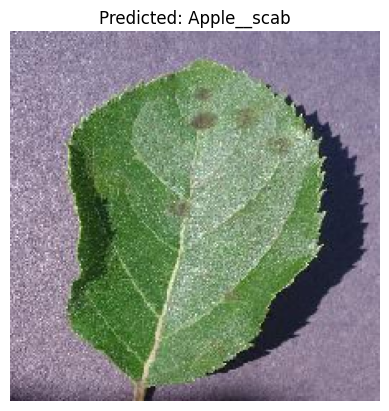

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1️⃣ Load trained model
classifier = load_model("AlexNet_Optimized.h5")

# 2️⃣ Load and preprocess image
image_path = r"C:\Users\ajayk\.cache\kagglehub\datasets\alinedobrovsky\plant-disease-classification-merged-dataset\versions\1\Apple__scab\0a769a71-052a-4f19-a4d8-b0f0cb75541c___FREC_Scab 3165.JPG"
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # normalize

# 3️⃣ Predict
predictions = classifier.predict(img_array)
predicted_index = np.argmax(predictions[0])
confidence = np.max(predictions[0]) * 100

# 4️⃣ Map index to class name
class_labels = list(train_gen.class_indices.keys())  # same generator used in training
predicted_class = class_labels[predicted_index]

# 5️⃣ Show result
print(f"✅ Prediction: {predicted_class}")
print(f"🔹 Confidence: {confidence:.2f}%")

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()


**Model Summary After Freezing**

**Compiling the Model**

**Image Preprocessing**

**Visualising Training Progress**

**Predicting New Test Image(s)**